# Word Graph 1

In [2]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
from community import community_louvain as louvain
import collections
import matplotlib.cm as cm


In [3]:
def load_edge_list(path, max_lines=None):
    edges = []
    with open(path, 'r', encoding='utf-8') as f:
        for i, line in enumerate(f):
            if max_lines and i >= max_lines:
                break
            line = line.strip()
            if not line or line.startswith('#'):
                continue
            parts = line.split()
            if len(parts) < 2:
                continue
            u, v = parts[0], parts[1]
            edges.append((u, v))
    return edges


In [15]:
print("\n==============================")
print("ISI DATA (Preview 10 Baris Pertama)")
print("==============================")
for i, (u, v) in enumerate(edges[:10], 1):
    print(f"Baris {i}: {u} {v}")
if len(edges) > 10:
    print("... (dan seterusnya sampai ribuan baris) ...")

print("\nMemuat data...")
print(f"Total Node (user): {G.number_of_nodes()}")
print(f"Total Edge (hubungan): {G.number_of_edges()}")


ISI DATA (Preview 10 Baris Pertama)
Baris 1: 0 1
Baris 2: 0 2
Baris 3: 0 3
Baris 4: 0 4
Baris 5: 0 5
Baris 6: 0 6
Baris 7: 0 7
Baris 8: 0 8
Baris 9: 0 9
Baris 10: 0 10
... (dan seterusnya sampai ribuan baris) ...

Memuat data...
Total Node (user): 4039
Total Edge (hubungan): 88234


In [5]:
partition = louvain.best_partition(G)
Q = louvain.modularity(partition, G)
print(f"Modularity Q: {Q:.4f}")

Modularity Q: 0.8350


In [7]:
deg = dict(G.degree())
bet = nx.betweenness_centrality(G, k=min(500, G.number_of_nodes()))

def top_nodes_in_community(metric_dict, k=5):
    df = pd.DataFrame({
        'node': list(metric_dict.keys()),
        'metric': list(metric_dict.values()),
        'community': [partition[n] for n in metric_dict.keys()]
    })
    return df.sort_values(['community','metric'], ascending=[True, False]).groupby('community').head(k)

top_deg = top_nodes_in_community(deg, k=5)
top_bet = top_nodes_in_community(bet, k=5)
print("\nTop degree per komunitas:")
print(top_deg.head(20))
print("\nTop betweenness per komunitas:")
print(top_bet.head(20))


Top degree per komunitas:
      node  metric  community
0        0     347          0
56      56      78          0
67      67      76          0
271    271      73          0
322    322      72          0
366    483     231          1
348    348     229          1
349    414     159          1
362    376     133          1
365    475     122          1
2831  3318      20          2
2252  2670      19          2
2450  2889      19          2
2837  3325      19          2
2282  2703      18          2
352   1912     755          3
2126  1941     223          3
2130  2047     205          3
1466  2384     188          3
1426  2111     184          3

Top betweenness per komunitas:
      node    metric  community
0        0  0.132947          0
58      58  0.089982          0
171    171  0.015452          0
119    119  0.001396          0
56      56  0.000926          0
1710   567  0.089089          1
371    563  0.060798          1
350    428  0.060474          1
349    414  0.051018   

In [8]:
inter_edges = [(u, v) for u, v in G.edges() if partition[u] != partition[v]]
inter_ratio = len(inter_edges) / G.number_of_edges()
print(f"Tepi antar komunitas: {len(inter_edges)} ({inter_ratio:.2%} dari total edges)")

Tepi antar komunitas: 3447 (3.91% dari total edges)


In [17]:
print("\nMendeteksi komunitas utama...")
partition = louvain.best_partition(G)
Q = louvain.modularity(partition, G)

sizes = collections.Counter(partition.values())
community_sizes = pd.Series(sizes).sort_values(ascending=False)

print(f"\n--- HASIL DETEKSI UTAMA (LEVEL 1) ---")
for comm_id, size in community_sizes.items():
    print(f"Komunitas {comm_id}: {size} anggota")

print(f"\nModularity      : {Q:.4f}")
print(f"Total Komunitas : {len(community_sizes)}")


Mendeteksi komunitas utama...

--- HASIL DETEKSI UTAMA (LEVEL 1) ---
Komunitas 10: 548 anggota
Komunitas 5: 535 anggota
Komunitas 9: 442 anggota
Komunitas 1: 430 anggota
Komunitas 4: 423 anggota
Komunitas 2: 354 anggota
Komunitas 6: 325 anggota
Komunitas 12: 237 anggota
Komunitas 0: 226 anggota
Komunitas 15: 206 anggota
Komunitas 8: 117 anggota
Komunitas 11: 73 anggota
Komunitas 14: 60 anggota
Komunitas 13: 25 anggota
Komunitas 3: 19 anggota
Komunitas 7: 19 anggota

Modularity      : 0.8350
Total Komunitas : 16


C:\Users\Syafiq Azizi\AppData\Local\Temp\ipykernel_3840\1268773823.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('tab20', len(communities))


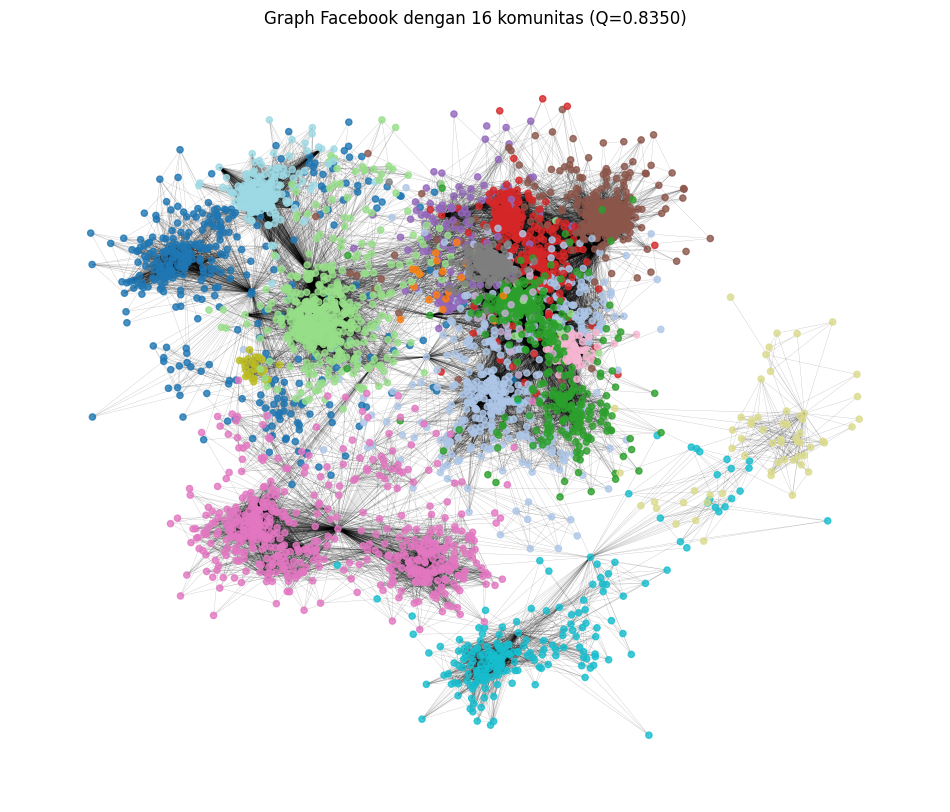

In [9]:
pos = nx.spring_layout(G, seed=42)
communities = set(partition.values())
cmap = cm.get_cmap('tab20', len(communities))

plt.figure(figsize=(12, 10))
nx.draw_networkx_nodes(
    G, pos,
    node_size=20,
    node_color=[partition[n] for n in G.nodes()],
    cmap=cmap,
    alpha=0.8
)
nx.draw_networkx_edges(G, pos, width=0.2, alpha=0.3)
plt.title(f'Graph Facebook dengan {len(communities)} komunitas (Q={Q:.4f})')
plt.axis('off')
plt.show()

In [ ]:

print("\n--- Anggota per komunitas ---")
for comm_id in sorted(community_sizes.index):
    members = [str(node) for node, c in partition.items() if c == comm_id]
    print(f"\nKomunitas {comm_id} ({len(members)} anggota):")
    print(", ".join(members))



--- Anggota per komunitas ---

Komunitas 0 (226 anggota):
3304, 2663, 2664, 2666, 2669, 2673, 2676, 2679, 2680, 2681, 2683, 2689, 2694, 2695, 2698, 2705, 2706, 2710, 2717, 2726, 2729, 2731, 2738, 2741, 2743, 2745, 2746, 2749, 2750, 2754, 2755, 2756, 2757, 2759, 2761, 2763, 2766, 2769, 2773, 2777, 2782, 2786, 2789, 2794, 2798, 2800, 2806, 2807, 2809, 2810, 2815, 2821, 2827, 2835, 2837, 2839, 2850, 2851, 2852, 2854, 2862, 2864, 2866, 2867, 2872, 2873, 2874, 2877, 2880, 2884, 2887, 2888, 2890, 2891, 2896, 2897, 2899, 2905, 2906, 2907, 2908, 2909, 2910, 2911, 2912, 2913, 2915, 2916, 2917, 2919, 2920, 2924, 2925, 2927, 2928, 2929, 2931, 2940, 2943, 2944, 2945, 2946, 2948, 2952, 2953, 2956, 2960, 2961, 2963, 2966, 2967, 2969, 2974, 2977, 2978, 2981, 2985, 2986, 2987, 2988, 2993, 2994, 3000, 3004, 3010, 3014, 3022, 3023, 3025, 3026, 3029, 3030, 3033, 3036, 3040, 3042, 3044, 3045, 3047, 3052, 3054, 3056, 3059, 3064, 3065, 3073, 3078, 3080, 3084, 3085, 3090, 3092, 3095, 3096, 3098, 3104, 3108,

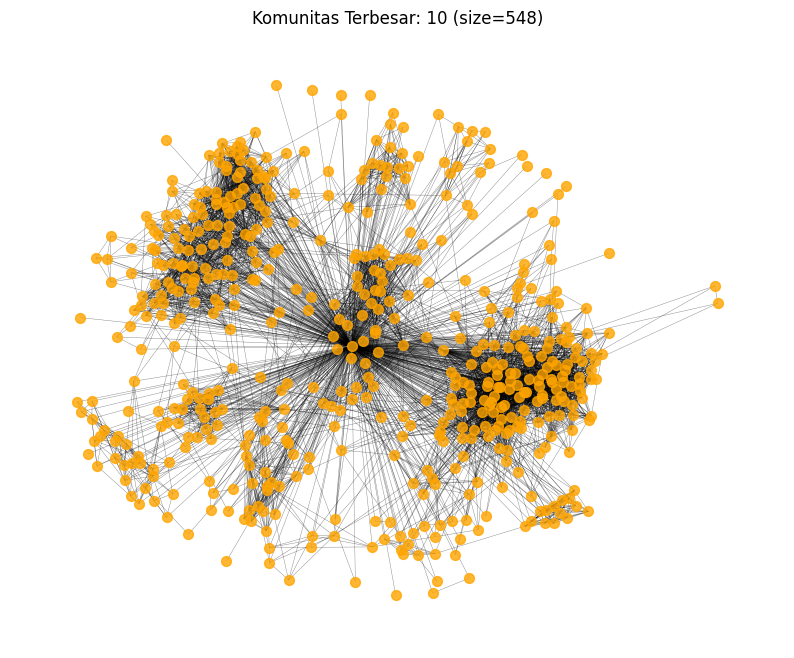

In [20]:
largest_comm = community_sizes.index[0]
nodes_largest = [n for n, c in partition.items() if c == largest_comm]
H = G.subgraph(nodes_largest).copy()

pos_H = nx.spring_layout(H, seed=42)
plt.figure(figsize=(10, 8))
nx.draw_networkx_nodes(
    H, pos_H,
    node_size=50,
    node_color='orange',
    alpha=0.8
)
nx.draw_networkx_edges(H, pos_H, width=0.3, alpha=0.5)
plt.title(f'Komunitas Terbesar: {largest_comm} (size={H.number_of_nodes()})')
plt.axis('off')
plt.show()